In [1]:
import requests
import pandas as pd
import datetime
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
date_from = '2021-08-01'
date_to = str(datetime.date.today())

req_url = f'https://leadgid.api.hasoffers.com/Apiv3/json?api_key=4dc79c63460150a918972cf84c9c4557ff0d063b1252d267fe50f9fcb5abf127&Target=Affiliate_Report&Method=getStats&fields[]=Stat.date&fields[]=Stat.affiliate_info3&fields[]=Stat.affiliate_info2&fields[]=Stat.affiliate_info1&fields[]=Stat.payout&fields[]=Stat.clicks&fields[]=Stat.offer_id&fields[]=Offer.name&filters[Stat.date][conditional]=BETWEEN&filters[Stat.date][values][]={date_from}&filters[Stat.date][values][]={date_to}&limit=5000'
req = requests.get(req_url).json()

In [3]:
conversion_list = []
columns = ['date', 'offer_name', 'offer_id', 'sub1', 'sub2', 'sub3', 'payout', 'clicks']

for item in req['response']['data']['data']:
    date = item['Stat']['date']
    offer_name = item['Offer']['name']
    offer_id = item['Stat']['offer_id']
    sub1 = item['Stat']['affiliate_info1']
    sub2 = item['Stat']['affiliate_info2']
    sub3 = item['Stat']['affiliate_info3']
    payout = item['Stat']['payout']
    clicks = item['Stat']['clicks']

    conversion_list.append([date, offer_name, offer_id, sub1, sub2, sub3, payout, clicks])

In [4]:
# conversion_list

In [5]:
df = pd.DataFrame(columns=columns, data=conversion_list)
df['date'] = pd.to_datetime(df['date'])
df['payout'] = pd.to_numeric(df['payout'])
df['clicks'] = df['clicks'].astype('int')
df['EPC'] = (df['payout'] / df['clicks']).round(2)
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df.head()

,date,offer_name,offer_id,sub1,sub2,sub3,payout,clicks,EPC,week,month
0,2021-08-01,VIVA деньги - онлайн выдача,5141,ppp,,,19200.0,475,40.42,30,8
1,2021-08-01,ТУРБОЗАЙМ - Выданный займ,2577,sm,,,11250.0,125,90.00,30,8
2,2021-08-01,Webbankir - выданный заём,3127,sm,,,5850.0,194,30.15,30,8
3,2021-08-01,Credit7 - выдача,4470,sm,,,6600.0,309,21.36,30,8
4,2021-08-01,BelkaCredit - выдача,4472,sm,,,5760.0,181,31.82,30,8


In [6]:
ppp = df.query('sub1 == "sm" & sub2 == "d0q1"')

In [7]:
# ppp = ppp.groupby(by=['date', 'offer_id']).agg({'clicks': 'sum', 'payout': 'sum'}).reset_index()
# ppp

ppp = ppp.pivot_table(index='week', columns='sub3', values='payout', aggfunc='sum', fill_value=0)
ppp['total_ckeck'] = ppp['kapusta_check'] + ppp['moneyman_check'] + ppp['vivus_check'] + ppp['webbankir_check']
ppp.tail(10)

sub3,kapusta_check,moneyman_check,random,vivus_check,webbankir_check,total_ckeck
week,,,,,,
39,73800,115425,261625,0,0,189225
40,110700,128250,263675,0,0,238950
41,75850,76950,176900,0,70400,223200
42,104550,73335,184350,11120,131200,320205
43,96350,133200,239405,71840,96000,397390
44,96350,145040,307420,70720,108800,420910
45,108650,115440,235490,64070,92800,380960
46,153750,156880,275250,117390,99200,527220
47,65600,243100,454830,109990,121760,540450


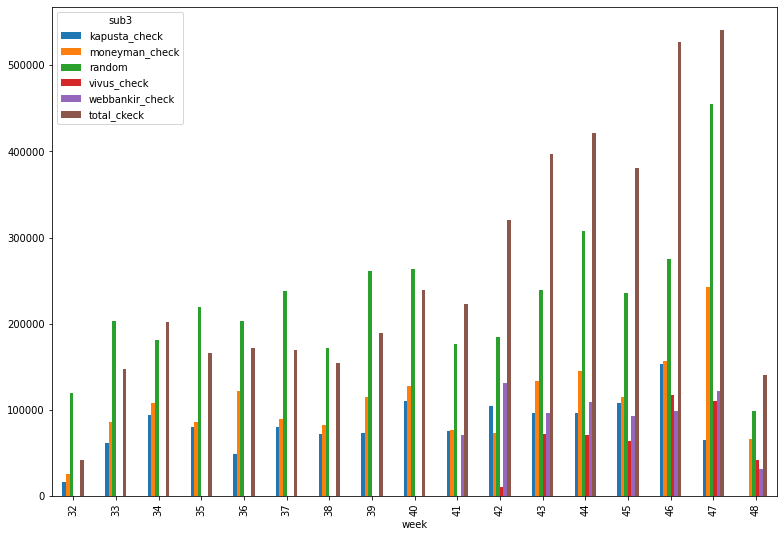

In [8]:
ppp.plot(kind='bar', figsize=(13, 9));

In [9]:
overall_data = df.pivot_table(index='week', columns='sub1', 
                              values='payout', aggfunc='sum', 
                              fill_value='0', margins=True)

overall_data.sort_values(by='All', axis=1, ascending=False).tail(10)

sub1,All,sm,ppp,,eml,sitbz,sm1,ads,d1q1
week,,,,,,,,,
40,1392310.0,1074460.0,307275.0,10575.0,0.0,0,0,0,0
41,976850.0,660750.0,303450.0,12650.0,0.0,0,0,0.0,0
42,1026260.0,780780.0,218325.0,18230.0,8925.0,0,0,0.0,0
43,1160300.0,906735.0,238125.0,15440.0,0.0,0,0,0,0
44,1376650.0,1018000.0,358650.0,0,0,0,0,0,0
45,1177140.0,935850.0,241290.0,0,0.0,0,0,0,0
46,1449070.0,1154880.0,294190.0,0,0.0,0,0,0,0
47,1792760.0,1492260.0,300500.0,0,0,0,0,0,0
48,404830.0,359230.0,45600.0,0,0,0,0,0,0


In [10]:
df

,date,offer_name,offer_id,sub1,sub2,sub3,payout,clicks,EPC,week,month
0,2021-08-01,VIVA деньги - онлайн выдача,5141,ppp,,,19200.0,475,40.42,30,8
1,2021-08-01,ТУРБОЗАЙМ - Выданный займ,2577,sm,,,11250.0,125,90.00,30,8
2,2021-08-01,Webbankir - выданный заём,3127,sm,,,5850.0,194,30.15,30,8
3,2021-08-01,Credit7 - выдача,4470,sm,,,6600.0,309,21.36,30,8
4,2021-08-01,BelkaCredit - выдача,4472,sm,,,5760.0,181,31.82,30,8
...,...,...,...,...,...,...,...,...,...,...,...
2655,2021-11-30,Займ-Экспресс - онлайн-выдача,3331,sm,d1q1,vitrina,1200.0,30,40.00,48,11
2656,2021-11-30,Pay P.S. - Выданный заём,4412,sm,d1q1,vitrina,3120.0,21,148.57,48,11
2657,2021-11-30,Быстроденьги - выданный займ онлайн,4464,sm,d1q1,vitrina,0.0,22,0.00,48,11
2658,2021-11-30,Vivus - Выдача,1782,sm,d0q1,vivus_check,18150.0,115,157.83,48,11


In [12]:
# ppp = df.query('sub1 == "ppp"').groupby(by=['week', 'offer_id']).agg({'clicks': 'sum', 'payout': 'sum'}).reset_index()
# ppp = ppp.pivot_table(index='date', columns='offer_id', values=['clicks', 'payout'], aggfunc='sum', fill_value=0)
# ppp.tail(10)

In [ ]:
# ppp.tail(10).plot(kind='bar', figsize=(13, 9), grid=True);

In [15]:
df.query('offer_id == "5141"')[''].max()

,date,offer_name,offer_id,sub1,sub2,sub3,payout,clicks,EPC,week,month
0,2021-08-01,VIVA деньги - онлайн выдача,5141,ppp,,,19200.0,475,40.42,30,8
9,2021-08-02,VIVA деньги - онлайн выдача,5141,ppp,,,16000.0,454,35.24,31,8
18,2021-08-03,VIVA деньги - онлайн выдача,5141,,,,3200.0,0,inf,31,8
19,2021-08-03,VIVA деньги - онлайн выдача,5141,ppp,,,28800.0,497,57.95,31,8
27,2021-08-04,VIVA деньги - онлайн выдача,5141,ppp,,,32000.0,472,67.80,31,8
...,...,...,...,...,...,...,...,...,...,...,...
2614,2021-11-28,VIVA деньги - онлайн выдача,5141,sm,d0q1,random,34200.0,236,144.92,47,11
2620,2021-11-29,VIVA деньги - онлайн выдача,5141,ppp,,,38000.0,938,40.51,48,11
2634,2021-11-29,VIVA деньги - онлайн выдача,5141,sm,d0q1,random,7600.0,213,35.68,48,11
2640,2021-11-30,VIVA деньги - онлайн выдача,5141,ppp,,,7600.0,404,18.81,48,11


In [16]:
df.query('offer_id == "5141"').min()

date                  2021-08-01 00:00:00
offer_name    VIVA деньги - онлайн выдача
offer_id                             5141
sub1                                     
sub2                                     
sub3                                     
payout                                0.0
clicks                                  0
EPC                                   0.0
week                                   30
month                                   8
dtype: object